In [1]:
# 1. Import Libraries
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:


# 2. Load the Dataset
data = pd.read_csv('/Users/md.jubayerhossain/Documents/salauddion/combined_emotion.csv')  # 🔥 Change to your actual CSV path

print("First 5 rows of the dataset:")
print(data.head())

# 3. Preprocess Text
def clean_text(text):
    text = text.lower()                      # lowercase
    text = re.sub(r'[^\w\s]', '', text)       # remove punctuation
    text = re.sub(r'\d+', '', text)           # remove numbers
    text = text.strip()                      # remove leading/trailing spaces
    return text

data['sentence'] = data['sentence'].apply(clean_text)

# 4. Encode Emotion Labels
le = LabelEncoder()
data['emotion_label'] = le.fit_transform(data['emotion'])

print("\nLabel Encoding Mapping:")
for idx, label in enumerate(le.classes_):
    print(f"{idx}: {label}")

# 5. Split into Training and Testing
X = data['sentence']
y = data['emotion_label']


First 5 rows of the dataset:
                                            sentence emotion
0      i just feel really helpless and heavy hearted    fear
1  ive enjoyed being able to slouch about relax a...     sad
2  i gave up my internship with the dmrg and am f...    fear
3                         i dont know i feel so lost     sad
4  i am a kindergarten teacher and i am thoroughl...    fear

Label Encoding Mapping:
0: anger
1: fear
2: joy
3: love
4: sad
5: suprise



Classification Report:
              precision    recall  f1-score   support

       anger       0.90      0.91      0.90     11863
        fear       0.85      0.86      0.86      9930
         joy       0.92      0.94      0.93     28614
        love       0.82      0.77      0.79      6911
         sad       0.94      0.94      0.94     24238
     suprise       0.80      0.68      0.74      2994

    accuracy                           0.90     84550
   macro avg       0.87      0.85      0.86     84550
weighted avg       0.90      0.90      0.90     84550



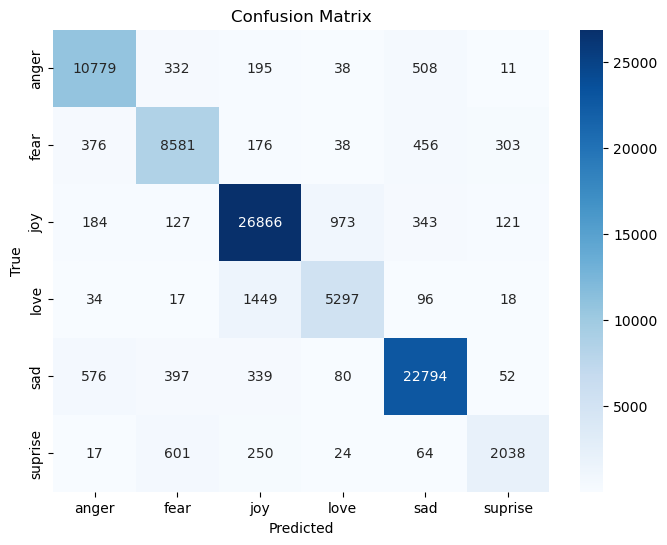

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

# 6. Vectorize Text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 7. Train a Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# 8. Make Predictions
y_pred = model.predict(X_test_tfidf)

# 9. Evaluate the Model
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 10. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [9]:
print(cm)

[[10779   332   195    38   508    11]
 [  376  8581   176    38   456   303]
 [  184   127 26866   973   343   121]
 [   34    17  1449  5297    96    18]
 [  576   397   339    80 22794    52]
 [   17   601   250    24    64  2038]]


In [7]:
# 11. Test on Custom Sentences
def predict_emotion(text):
    text = clean_text(text)
    vectorized_text = tfidf.transform([text])
    pred = model.predict(vectorized_text)
    emotion = le.inverse_transform(pred)[0]
    return emotion

# Test examples
examples = [
    "I feel amazing today!",
    "I'm scared of the exam results.",
    "I miss you so much.",
    "Why do I feel so angry?"
]

print("\nCustom Predictions:")
for sentence in examples:
    print(f"Sentence: '{sentence}' => Predicted Emotion: {predict_emotion(sentence)}")


Custom Predictions:
Sentence: 'I feel amazing today!' => Predicted Emotion: suprise
Sentence: 'I'm scared of the exam results.' => Predicted Emotion: fear
Sentence: 'I miss you so much.' => Predicted Emotion: joy
Sentence: 'Why do I feel so angry?' => Predicted Emotion: anger


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/md.jubayerhossain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/md.jubayerhossain/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                            sentence emotion
0      i just feel really helpless and heavy hearted    fear
1  ive enjoyed being able to slouch about relax a...     sad
2  i gave up my internship with the dmrg and am f...    fear
3                         i dont know i feel so lost     sad
4  i am a kindergarten teacher and i am thoroughl...    fear

Classification Report:

              precision    recall  f1-score   support

       anger       0.91      0.92      0.91     11863
        fear       0.85      0.86      0.85      9930
         joy       0.92      0.93      0.93     28614
        love       0.79      0.77      0.78      6911
         sad       0.95      0.95      0.95     24238
     suprise       0.73      0.67      0.70      2994

    accuracy                           0.90     84550
   macro avg       0.86      0.85      0.85     84550
weighted avg       0.90      0.90      0.90     84550



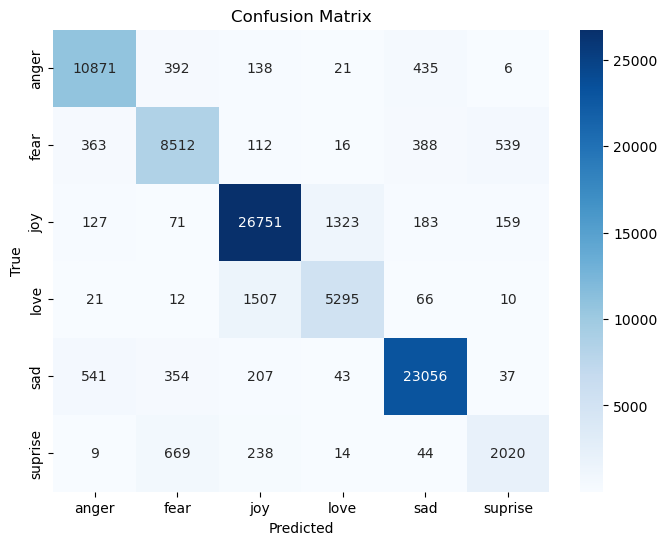


Model and Vectorizer have been saved successfully.


In [1]:
# 📚 Import libraries
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import joblib  # Import joblib for saving the model

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# 📂 Load your dataset
df = pd.read_csv('/Users/md.jubayerhossain/Documents/salauddion/combined_emotion.csv')  # Change to your dataset path
print(df.head())  # Display first few rows of the dataset to understand the structure

# 🧹 Preprocessing function
def preprocess_text(text, stop_words):
    """
    Preprocess the input text by:
    1. Converting to lowercase.
    2. Removing punctuation and numbers.
    3. Removing stopwords.
    4. Lemmatizing the words.
    
    Arguments:
    text : str : The input text to preprocess.
    stop_words : set : A set of stopwords to remove from the text.
    
    Returns:
    str : The preprocessed text.
    """
    text = text.lower()  # Convert text to lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    words = text.split()  # Split into individual words
    words = [w for w in words if w not in stop_words]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]  # Lemmatize the words
    return " ".join(words)  # Return the cleaned text

# Load stopwords once and pass to the preprocessing function
stop_words = set(stopwords.words('english'))

# Apply preprocessing to the 'sentence' column
df['clean_sentence'] = df['sentence'].apply(preprocess_text, stop_words=stop_words)

# 🏷️ Encode labels
emotion_mapping = {'anger': 0, 'fear': 1, 'joy': 2, 'love': 3, 'sad': 4, 'suprise': 5}
df['emotion_label'] = df['emotion'].map(emotion_mapping)

# 🧠 Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df['clean_sentence'], df['emotion_label'], test_size=0.2, random_state=42, stratify=df['emotion_label'])

# ✨ TF-IDF Vectorizer with N-grams
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 🤖 Train a Linear SVM model
model = LinearSVC()
model.fit(X_train_vec, y_train)

# 🔍 Evaluate
y_pred = model.predict(X_test_vec)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=emotion_mapping.keys()))

# 📊 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_mapping.keys(), yticklabels=emotion_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 💾 Save the trained model and vectorizer
joblib.dump(model, 'emotion_classifier_model.pkl')  # Save the trained model
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')    # Save the vectorizer

print("\nModel and Vectorizer have been saved successfully.")

In [ ]:
# 📚 Import necessary libraries
import re
import string
import nltk
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# 🧹 Preprocessing function (same as training)
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    words = text.split()  # Split into words
    words = [w for w in words if w not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]  # Lemmatize words
    return " ".join(words)  # Join the words back into a string

# 🎯 Emotion Mapping (same as training)
emotion_mapping = {0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'sad', 5: 'suprise'}

# 📥 Load the trained model and vectorizer
model = joblib.load('emotion_classifier_model.pkl')  # Path where you saved the model
vectorizer = joblib.load('tfidf_vectorizer.pkl')  # Path where you saved the vectorizer

# 🤖 Chatbot loop
print("🤖 ChatBot: Hello! I'm here to detect your emotion. Type 'exit' to leave.\n")

while True:
    user_input = input("You: ")
    
    if user_input.lower() == 'exit':
        print("🤖 ChatBot: Goodbye! Have a nice day! 👋")
        break
    
    # Preprocess the user's input and transform it using the vectorizer
    clean_input = preprocess_text(user_input)
    input_vec = vectorizer.transform([clean_input])
    
    # Predict the emotion using the model
    predicted_label = model.predict(input_vec)[0]
    predicted_emotion = emotion_mapping[predicted_label]
    
    # 🌟 Custom feedback based on emotion
    feedback = {
        'anger': "😡 Oh, you sound angry. Take a deep breath. I'm here for you!",
        'fear': "😨 It seems you're scared. Everything will be okay, stay strong!",
        'joy': "😊 You seem happy! That's wonderful! Keep smiling!",
        'love': "💖 Awww, you are feeling love! Spread the positivity!",
        'sad': "😢 I'm sorry you're feeling sad. Remember, tough times don't last.",
        'suprise': "😲 You sound surprised! Hope it’s a good surprise!"
    }
    
    # Display the emotion and the custom feedback
    print(f"🤖 ChatBot: I sense {predicted_emotion.upper()}.\n{feedback[predicted_emotion]}\n")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/md.jubayerhossain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/md.jubayerhossain/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


🤖 ChatBot: Hello! I'm here to detect your emotion. Type 'exit' to leave.



You:  I'm sorry you're feeling sad. Remember, tough times don't last.


🤖 ChatBot: I sense SAD.
😢 I'm sorry you're feeling sad. Remember, tough times don't last.



You:  Need to helping person that's be careful me


🤖 ChatBot: I sense ANGER.
😡 Oh, you sound angry. Take a deep breath. I'm here for you!



You:  you are feeling love


🤖 ChatBot: I sense JOY.
😊 You seem happy! That's wonderful! Keep smiling!



You:  It seems you're scared. Everything will be okay, stay strong


🤖 ChatBot: I sense FEAR.
😨 It seems you're scared. Everything will be okay, stay strong!



In [ ]:
from flask import Flask, render_template, request
import re
import string
import joblib
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize Flask app
app = Flask(__name__)

# Load the trained model and vectorizer
model = joblib.load('emotion_classifier_model.pkl')  # Path where you saved the model
vectorizer = joblib.load('tfidf_vectorizer.pkl')  # Path where you saved the vectorizer

# 🎯 Emotion Mapping
emotion_mapping = {0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'sad', 5: 'suprise'}

# 🧹 Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    words = text.split()  # Split into words
    words = [w for w in words if w not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]  # Lemmatize words
    return " ".join(words)  # Join the words back into a string

# Home route to show the input form
@app.route('/')
def home():
    return render_template('index.html')  # Create an HTML form (explained below)

# Emotion detection route
@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        user_input = request.form['text_input']  # Get the user input from the form
        
        # Preprocess the user input
        clean_input = preprocess_text(user_input)
        input_vec = vectorizer.transform([clean_input])
        
        # Predict the emotion
        predicted_label = model.predict(input_vec)[0]
        predicted_emotion = emotion_mapping[predicted_label]
        
        # 🌟 Custom feedback based on emotion
        feedback = {
            'anger': "😡 Oh, you sound angry. Take a deep breath. I'm here for you!",
            'fear': "😨 It seems you're scared. Everything will be okay, stay strong!",
            'joy': "😊 You seem happy! That's wonderful! Keep smiling!",
            'love': "💖 Awww, you are feeling love! Spread the positivity!",
            'sad': "😢 I'm sorry you're feeling sad. Remember, tough times don't last.",
            'suprise': "😲 You sound surprised! Hope it’s a good surprise!"
        }
        
        return render_template('result.html', emotion=predicted_emotion, feedback=feedback[predicted_emotion])

# Run the app
if __name__ == '__main__':
    app.run(debug=True)

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Emotion Detection Chatbot</title>
</head>
<body>
    <h1>Emotion Detection Chatbot 🤖</h1>
    <form action="/predict" method="POST">
        <label for="text_input">Enter your sentence:</label>
        <input type="text" id="text_input" name="text_input" required>
        <button type="submit">Predict Emotion</button>
    </form>
</body>
</html>

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Emotion Detected</title>
</head>
<body>
    <h1>Detected Emotion: {{ emotion | upper }}</h1>
    <p>{{ feedback }}</p>
    <br>
    <a href="/">Go back</a>
</body>
</html>